In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./crop_yield.csv")
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
df.describe

<bound method NDFrame.describe of        Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0        West     Sandy   Cotton   897.077239            27.676966   
1       South      Clay     Rice   992.673282            18.026142   
2       North      Loam   Barley   147.998025            29.794042   
3       North     Sandy  Soybean   986.866331            16.644190   
4       South      Silt    Wheat   730.379174            31.620687   
...       ...       ...      ...          ...                  ...   
999995   West      Silt     Rice   302.805345            27.987428   
999996  South    Chalky   Barley   932.991383            39.661039   
999997  North     Peaty   Cotton   867.362046            24.370042   
999998   West      Silt    Wheat   492.812857            33.045505   
999999   West     Sandy    Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                 False             True      

In [6]:
df.apply(pd.Series.unique)

Region                                           [West, South, North, East]
Soil_Type                          [Sandy, Clay, Loam, Silt, Peaty, Chalky]
Crop                          [Cotton, Rice, Barley, Soybean, Wheat, Maize]
Rainfall_mm               [897.0772391, 992.6732816, 147.9980253, 986.86...
Temperature_Celsius       [27.67696637, 18.02614225, 29.79404242, 16.644...
Fertilizer_Used                                               [False, True]
Irrigation_Used                                               [True, False]
Weather_Condition                                    [Cloudy, Rainy, Sunny]
Days_to_Harvest           [122, 140, 106, 146, 110, 74, 90, 61, 127, 73,...
Yield_tons_per_hectare    [6.555816258, 8.527340906, 1.127443336, 6.5175...
dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [8]:
# Encoding "Region ", "Soil_Type", "Crop ", "Fertilizer_Used" , "Irrigation_Used" and "Weather_Condition"
# Encoding Method - One hot encoding (to avoid any ordinal relationships)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(handle_unknown='ignore'),[0,1,2,5,6,7])],remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

In [9]:
# Creating and training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # RMSE is the square root of MSE

# Print results
print(f'R² Score: {r2:.4f}')  # Good if close to 1
print(f'MAE: {mae:.4f}')       # Lower is better
print(f'MSE: {mse:.4f}')       # Lower is better
print(f'RMSE: {rmse:.4f}')     # Lower is better

R² Score: 0.9129
MAE: 0.3998
MSE: 0.2510
RMSE: 0.5010


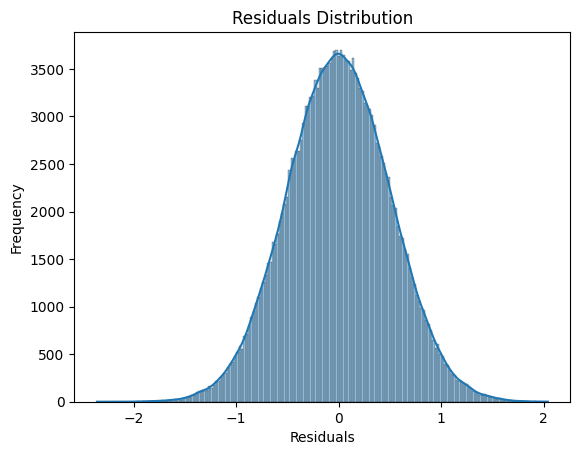

In [11]:
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


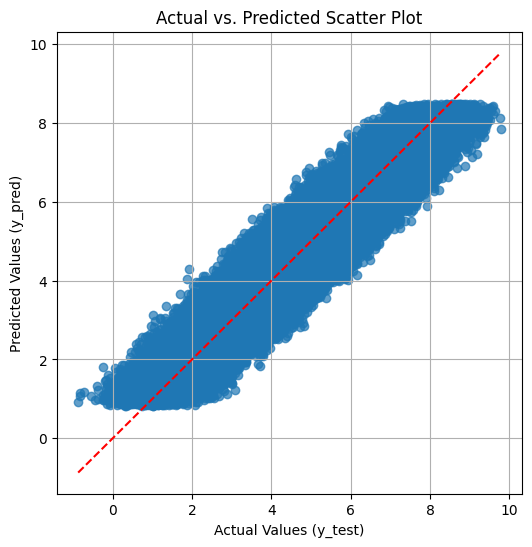

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Ideal line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Scatter Plot")
plt.grid(True)
plt.show()


In [12]:
# user_input = input("Enter values (comma-separated) in this order:\n"
#                        "Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, "
#                        "Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest\n"
#                        "Example: North,Loam,Wheat,850,25.5,True,False,Sunny,120\n\n")
# new_data = user_input.split(',')
# new_data[3] = float(new_data[3])  # Rainfall
# new_data[4] = float(new_data[4])  # Temperature
# new_data[5] = new_data[5].upper()  # Convert to "TRUE" or "FALSE"
# new_data[6] = new_data[6].upper()

# new_data[8] = int(new_data[8])  # Days_to_Harvest

# import copy

# ct2 = copy.deepcopy(ct)


# new_sample_encoded =  ct2.transform([new_data])
# new_sample_encoded[0][-1] = int(new_sample_encoded[0][-1])
# new_sample_encoded[0][-2] = float(new_sample_encoded[0][-2])
# new_sample_encoded[0][-3] = float(new_sample_encoded[0][-3])
# new_sample_reshaped = new_sample_encoded.reshape(1, -1)
# predicted_yield = regressor.predict(new_sample_reshaped)
# print(f" Predicted Crop Yield (tons per hectare): {predicted_yield}")

In [13]:
input_data = [['West', 'Sandy', 'Soybean', 867.6209554, 15.94968256, "TRUE", "FALSE", 'Cloudy', 119]]
temp_df = pd.DataFrame(input_data, columns=['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 
                                            'Temperature_Celsius', 'Fertilizer_Used', 
                                            'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest'])
temp_x = temp_df.iloc[:,:].values
temp_test = np.array(ct.transform(temp_x))

In [14]:
temp_test

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 867.6209554,
        15.94968256, 119]], dtype=object)

In [15]:
X_test

array([[0.0, 0.0, 1.0, ..., 227.292224, 35.30742829, 110],
       [0.0, 1.0, 0.0, ..., 612.6949107, 26.42189141, 68],
       [0.0, 0.0, 0.0, ..., 952.4851086, 32.99313016, 73],
       ...,
       [0.0, 0.0, 1.0, ..., 855.9344019, 16.05444564, 146],
       [1.0, 0.0, 0.0, ..., 120.7941851, 28.08816669, 73],
       [1.0, 0.0, 0.0, ..., 759.6952454, 34.77765626, 135]], dtype=object)